In [21]:
# Setup 기본 설정
import numpy as np
import matplotlib.pyplot as plt

# Setup FIR 필터링을 위한 scipy.signal 임포트
from scipy.signal import firwin, lfilter, freqz


#
# Jupyter에서 그래프 크게 보기
#
plt.rcParams["figure.figsize"] = (8, 3)

## 1. Audio Mixer (Summation)



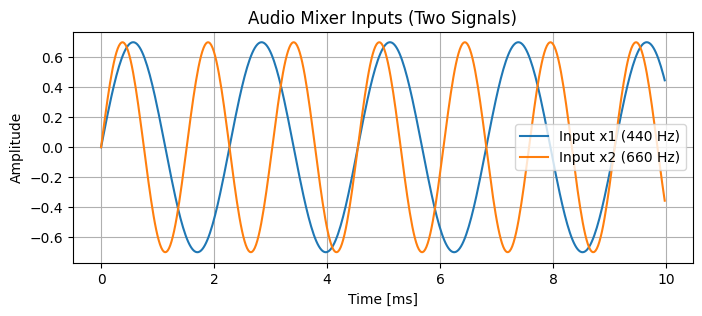

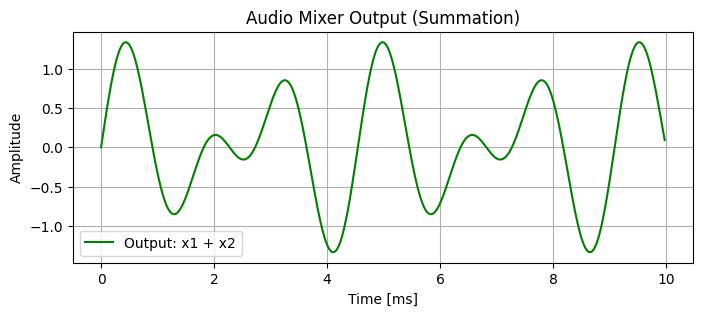

In [22]:
# Cell 2: Audio Mixer - 덧셈(Summation)

# Audio Mixer - 2 Inputs + 1 Output

fs = 44100          # 샘플링 주파수 (44.1 kHz, 오디오)
T  = 0.01           # 10 ms만 보기
t  = np.linspace(0, T, int(fs*T), endpoint=False)

f1 = 440            # A4(라) 440 Hz
f2 = 660            # 660 Hz

x1 = 0.7 * np.sin(2*np.pi*f1*t)
x2 = 0.7 * np.sin(2*np.pi*f2*t)

y_audio = x1 + x2   # Audio Mixer: 단순 덧셈

# figure 1: 두 입력을 한 창에 표시
plt.figure()
plt.plot(t*1000, x1, label="Input x1 (440 Hz)")
plt.plot(t*1000, x2, label="Input x2 (660 Hz)")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("Audio Mixer Inputs (Two Signals)")
plt.legend()
plt.grid(True)
plt.show()

# figure 2: 출력만 한 창에 표시
plt.figure()  # figsize=(8, 2)
plt.plot(t*1000, y_audio, label="Output: x1 + x2", color="green")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("Audio Mixer Output (Summation)")
plt.legend()
plt.grid(True)
plt.show()

## **2. RF Mixer(Multiplication)**     

* Sin/Cos 
    * [Sine/Cosine](https://en.wikipedia.org/wiki/Sine_and_cosine)                    
         

* [Product-to-sum identities](https://en.wikipedia.org/wiki/List_of_trigonometric_identities#Product-to-sum_and_sum-to-product_identities)   

$$
\sin a \cdot \sin b
=
\frac{1}{2}
\left[
\cos(a-b)
-
\cos(a+b)
\right]
$$

$$
\cos a \cdot \cos b
=
\frac{1}{2}
\left[
\cos(a-b)
+
\cos(a+b)
\right]
$$

$$
\sin a \cdot \cos b
=
\frac{1}{2}
\left[
\sin(a+b)
+
\sin(a-b)
\right]
$$

$$
\cos a \cdot \sin b
=
\frac{1}{2}
\left[
\sin(a+b)
-
\sin(a-b)
\right]
$$

<br/>


* $$ \cos (ω1t + ϕ1) \cdot \cos (ω2t + ϕ2) $$

$$
\cos (ω1t + ϕ1) \cdot \cos (ω2t + ϕ2) 
=
\frac{1}{2}
\left[
\cos((ω1​−ω2)t + (ϕ1​−ϕ2)​ )
+
\cos((ω1​−ω2)t + (ϕ1​−ϕ2)​ )
\right]
$$

* **Mixer Output**    
    * **FrequcyPhase Diffrence**   
    * Frequncy/Phase Sum  

<br/>

| Component | Frequency Term | Phase Term | Usage |
|----------|----------------|------------|------|
| **IF (Difference)** | Δf = ω1​−ω2 | Δφ = ϕ1​−ϕ2​ |  ✔ Radar/RF Mixer used|
| **HF (Sum)** |   Δf = ω1+ω2 | Δφ = ϕ1​+ϕ2​ | ✖ Removed by LPF  |


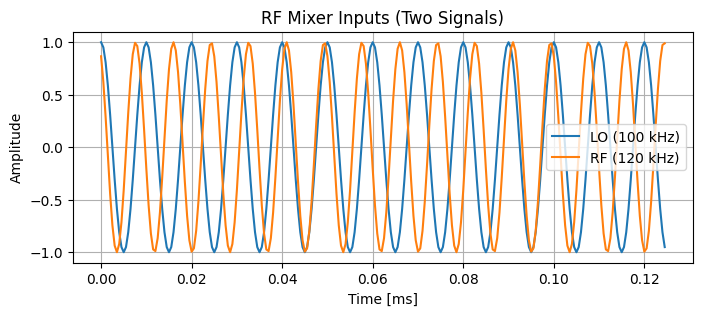

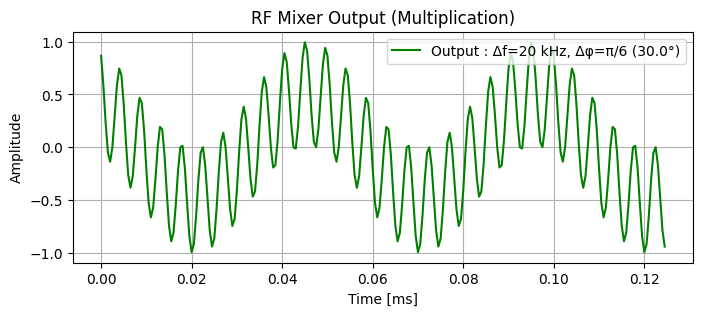

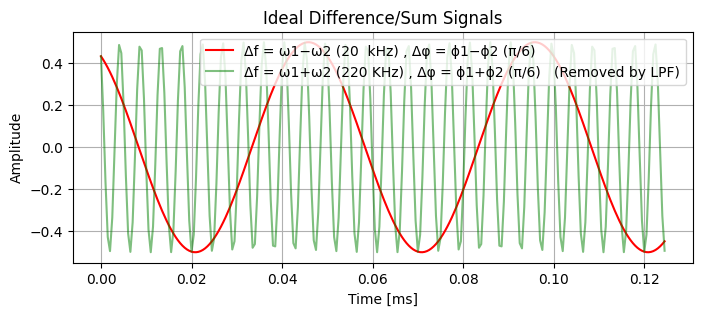

In [23]:
# Cell 2: RF Mixer - 곱셈(Multiplication)으로 주파수/위상 차이 생성

fs = 2000_000        # Sampling Frequency 2000 kHz 
T  = 0.000125        # 0.125 ms   Y축 
t  = np.linspace(0, T, int(fs*T), endpoint=False)

f_lo = 100_000      # LO = 100 kHz
f_rf = 120_000      # RF = 120 kHz

phase_lo = 0.0
phase_rf = np.deg2rad(30)  # RF 위상 30도

lo = np.cos(2*np.pi*f_lo*t + phase_lo)
rf = np.cos(2*np.pi*f_rf*t + phase_rf)

# RF Mixer: 곱셈
y_rf = lo * rf      # x_out = x1 * x2

# Δf Frequency Difference and Sum
f_dif_1 = abs(f_rf - f_lo)  # 20 kHz
f_sum_1 = abs(f_rf + f_lo)  # 220 kHz

# Δφ Phase Difference and Sum
phase_dif = phase_rf - phase_lo   
phase_sum = phase_rf + phase_lo
phi_diff_deg = np.rad2deg(phase_dif) # 도(degree)로 보기 좋게
phi_pi = phase_dif / np.pi  # π 기준 환산

# Expected Comparison Signals (믹서 곱셈의 결과가 0.5 배이므로)
ideal_020k = 0.5 * np.cos(2*np.pi*f_dif_1*t + phase_dif)
ideal_220k = 0.5 * np.cos(2*np.pi*f_sum_1*t + phase_sum)


# figure 1: 두 입력을 한 창에 표시
plt.figure()
plt.plot(t*1000, lo, label="LO (100 kHz)")
plt.plot(t*1000, rf, label="RF (120 kHz)")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("RF Mixer Inputs (Two Signals)")
plt.legend()
plt.grid(True)
plt.show()

# figure 2: 출력만 한 창에 표시
textstr1 = f'Output : Δf={f_dif_1/1000:.0f} kHz, Δφ=π/6 ({phi_diff_deg:.1f}°)'
plt.figure()
plt.plot(t*1000, y_rf, label=textstr1, color="green",linewidth=1.5)
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("RF Mixer Output (Multiplication)")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# figure 3-1: Compare Output with Expected Difference Signal
textstr2 = f'Δf = ω1​−ω2 (20  kHz) , Δφ = ϕ1​−ϕ2​ (π/6)     '
textstr3 = f'Δf = ω1+ω2 (220 KHz) , Δφ = ϕ1+ϕ2 (π/6)   (Removed by LPF)'
plt.figure()
plt.plot(t*1000, ideal_020k, label=textstr2, color="red",linewidth=1.5)
plt.plot(t*1000, ideal_220k, label=textstr3, color="green",linewidth=1.5,alpha=0.5)
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("Ideal Difference/Sum Signals")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


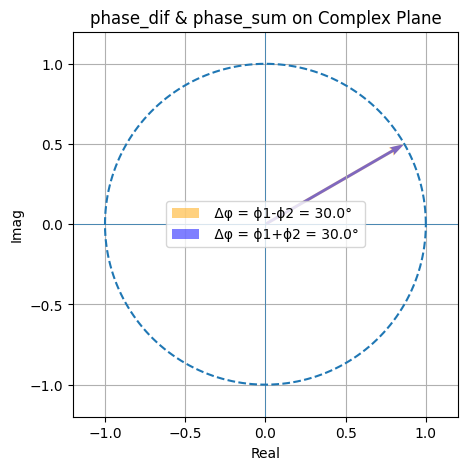

In [ ]:
# 1) 복소수 변환 (Complex Plane)
z_dif = np.exp(1j * phase_dif)
z_sum = np.exp(1j * phase_sum)

plt.figure(figsize=(5, 5))

# 2) 단위원(참고용 원) 그리기
theta = np.linspace(0, 2*np.pi, 400)
plt.plot(np.cos(theta), np.sin(theta), linestyle='--')  # unit circle

# 3) 좌표축
plt.axhline(0, linewidth=0.5)
plt.axvline(0, linewidth=0.5)


# 4) Δφ 벡터
plt.quiver(
    0, 0,                      # 시작점 (0,0)
    z_dif.real, z_dif.imag,    # 끝점 (Re, Im)
    angles='xy', scale_units='xy', scale=1,
    label=f" Δφ = ϕ1-ϕ2 = {np.rad2deg(phase_dif):.1f}°",
    color='orange',
    width=0.008,
    alpha=0.5
)

# 5) φ_sum 벡터
plt.quiver(
    0, 0,
    z_sum.real, z_sum.imag,
    angles='xy', scale_units='xy', scale=1,
    label=f" Δφ = ϕ1+ϕ2 = {np.rad2deg(phase_sum):.1f}°",
    color='blue',
    alpha=0.5
)


# 6) 설정
plt.gca().set_aspect('equal', 'box')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.legend()
plt.title('ϕ1-ϕ2 & ϕ1+ϕ2 on Complex Plane')

plt.grid(True)
plt.show()

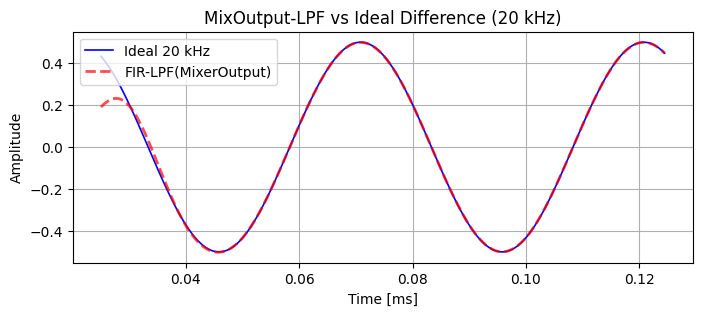

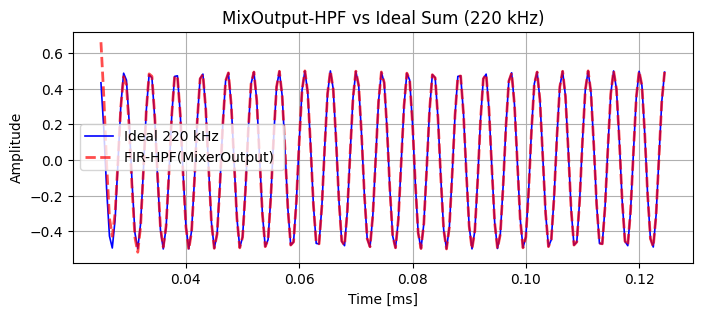

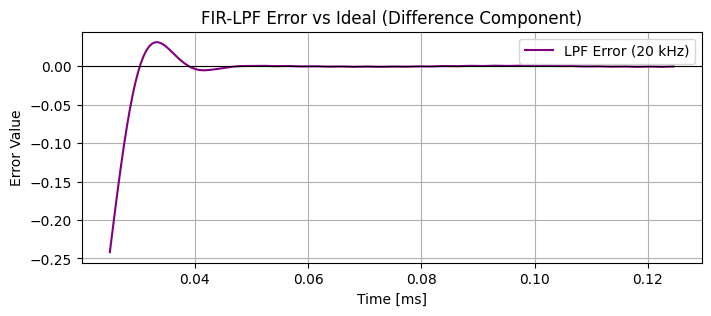

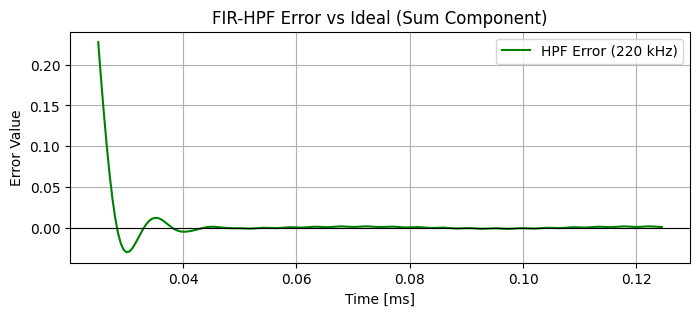

In [24]:
# ================================
# 1. FIR LPF/HPF 설계
# ================================
num_taps = 101        # FIR 필터 탭 수 (데모용으로 101, 원하면 더 늘려도 됨)
lpf_cutoff = 60_000   # 60 kHz 까지 통과 (20 kHz는 확실히 통과, 220 kHz는 최대한 억제)
hpf_cutoff = 100_000  # 100 kHz 이상만 통과 → 220 kHz 성분 통과, 20 kHz는 억제


lpf = firwin(num_taps, cutoff=lpf_cutoff, fs=fs)  # 저역 통과 FIR
hpf = firwin(num_taps, cutoff=hpf_cutoff, fs=fs, pass_zero=False)     # 고역 통과 FIR

# ================================
# 2. Mixer 출력에 필터 적용
# ================================
y_lpf = lfilter(lpf, 1.0, y_rf)   # 저역통과 결과 (20 kHz 근처)
y_hpf = lfilter(hpf, 1.0, y_rf)   # 고역통과 결과 (220 kHz 근처)

#
#  FIR 필터 group delay 만큼 버림
#
delay = (num_taps - 1) // 2  # group delay = 50 samples

t_valid = t[delay:]
y_lpf_valid = y_lpf[delay:]
y_hpf_valid = y_hpf[delay:]

# Ideal 과 동일한 Sample 수로 맞춤 (필터 지연 고려하지 않고 단순 자름)
ideal_20k_valid =  ideal_020k[:len(y_lpf_valid)]
ideal_220k_valid = ideal_220k[:len(y_hpf_valid)]



# figure 3-2. LPF 결과와 이론적인 Δf(20 kHz) 비교
plt.figure()
plt.plot(t_valid*1000, ideal_20k_valid  , label="Ideal 20 kHz"          , color="blue"  , linewidth=1.2)
plt.plot(t_valid*1000, y_lpf_valid      , label="FIR-LPF(MixerOutput)"  , color="red"   , linewidth=2.0, linestyle="--", alpha=0.7)
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("MixOutput-LPF vs Ideal Difference (20 kHz)")
plt.legend()
plt.grid(True)
plt.show()

# figure 3-3. HPF 결과와 이론적인 합 주파수(220 kHz) 비교
plt.figure()
plt.plot(t_valid*1000, ideal_220k_valid , label="Ideal 220 kHz"         , color="blue"  ,linewidth=1.2)
plt.plot(t_valid*1000, y_hpf_valid      , label="FIR-HPF(MixerOutput) " , color="red"   ,linewidth=2.0, linestyle="--" , alpha=0.7)
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("MixOutput-HPF vs Ideal Sum (220 kHz)")
plt.legend()
plt.grid(True)
plt.show()


# Real vs Ideal 비교를 위한 오차 계산
error_lpf = y_lpf_valid - ideal_20k_valid
error_hpf = y_hpf_valid - ideal_220k_valid

plt.figure()
plt.plot(t_valid*1000, error_lpf, label="LPF Error (20 kHz)", color="purple")
plt.axhline(0, color='black', linewidth=0.8)
plt.title("FIR-LPF Error vs Ideal (Difference Component)")
plt.xlabel("Time [ms]")
plt.ylabel("Error Value")
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(t_valid*1000, error_hpf, label="HPF Error (220 kHz)", color="green")
plt.axhline(0, color='black', linewidth=0.8)
plt.title("FIR-HPF Error vs Ideal (Sum Component)")
plt.xlabel("Time [ms]")
plt.ylabel("Error Value")
plt.grid(True)
plt.legend()
plt.show()
